\centerline{\textbf{ Niels Clayton - 300437590}}

# Question 1

## Introduction

Import the matrix from the "matrix.mtx" file.

## Procedure

using the scipy.io.mmread() function, we import the matrix
from the "matrix.mtx" file, and then we convert it to a
numpy array for ease of use. 


In [25]:
from _curses import error
import numpy as np
import matplotlib.pyplot as plt
import scipy.io as sci


In [26]:
def load():
    return sci.mmread("matrix1.mtx").toarray()


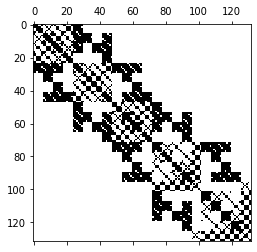

In [27]:
A = load()
plt.spy(A)
plt.show()


## Observations & discussion

It can be observed that the file is correctly imported,
and that the matrix plotted above is the same as the one 
from the assignment script. I have made the loading of the 
file into a function so that it can be loaded more easily
since it must be loaded multiple times.

## Conclusions

The loading of the file was successful.


# Question 2


## Introduction

Implement the cholesky and band_cholesky factorisation
algorithms in python.

## Procedure

Implement the chelesky factorisation algorithm, taking in the matrix 
as argument A


In [28]:
def cholesky(A1):
    A = A1.copy()
    n = len(A)

    for i in range(n):

        try:
            A[i, i] = np.sqrt(A[i, i] - np.dot(A[i, 0:i], A[i, 0:i]))
        except ValueError:
            error.err('Matrix is not positive definite')


        for j in range(i + 1, n):
            A[j, i] = (A[j, i] - np.dot(A[j, 0:i], A[i, 0:i])) / A[i, i]

    for k in range(1, n):
        A[0:k, k] = 0.0

    return A


Implement the band_chelesky factorisation algorithm, taking in the matrix 
as argument A, and the bandwidth of the matrix p

In [29]:
def band_cholesky(A1, p):
    A = A1.copy()
    test = A1.copy()
    n = len(A)

    for j in range(n):
        
        try:
            test[j, j] = np.sqrt(abs(test[j, j] - np.dot(test[j, 0:j], test[j, 0:j])))
        except ValueError:
            error.err('Matrix is not positive definite')


        for k in range( max(0, j-p), j):
            λ = min(k+p+1, n)
            A[j:λ, j] = A[j:λ, j] - np.dot(A[j, k], A[j:λ, k])

        λ = min(j+p+1, n)
        A[j:λ, j] = A[j:λ, j] / np.sqrt(abs(A[j,j]))

    for k in range(1, n):
        A[0:k, k] = 0.0

    return A


## Observations & Discussion

These functions are quite similar in principle, with the main 
difference being that the band_cholesky function will only compute the 
values within the  given band denoted by the input parameter p. This 
results in the removal of redundant calculation, resulting in a less
computationally intensive algorithm.

## Conclusions

It can be concluded that the two algorithms will produce very similar 
results, however the band_cholesky algorithm will be more efficient in
its calculations.



# Question 3


## Introduction

In question 3 we will use the functions implemented in in part 2 to factorise the matrix 
loaded in part 1. We will compare the  output of these factorisations using the 
cholesky, band_cholesky, and the numpy.linalg.cholesky algorithms. We will then 
attempt to transform them back to the original matrix using the property $A = LL^T$. 
we will then look at the overall error produced by each of these functions when compared to 
the original matrix. 

## Procedure

Define an inverse function to calculate A from L using $A = LL^T$.


In [30]:

def inverse_cholesky(L1):
    L = L1.copy()
    L_T = np.transpose(L)
    return np.matmul(L, L_T)



Plot the outputs the factorisation using each algorithm, and then plot what A is after
inverting the calculation along with the total error.


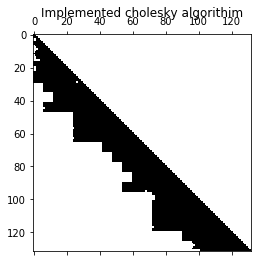

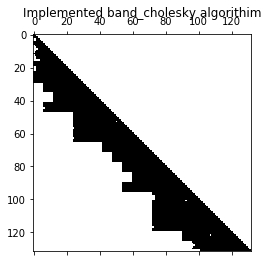

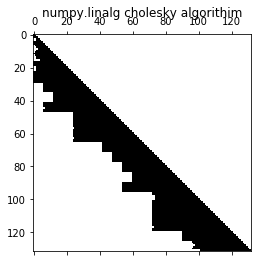

In [31]:

L1 = cholesky(A)
L2 = band_cholesky(A,48)
L3 = np.linalg.cholesky(A)

plt.spy(L1)
plt.title("Implemented cholesky algorithim")
plt.show()

plt.spy(L2)
plt.title("Implemented band_cholesky algorithim")
plt.show()

plt.spy(L3)
plt.title("numpy.linalg cholesky algorithim")
plt.show()


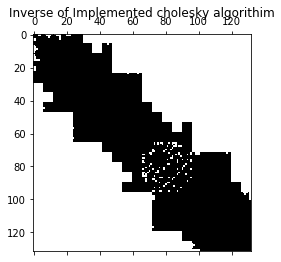

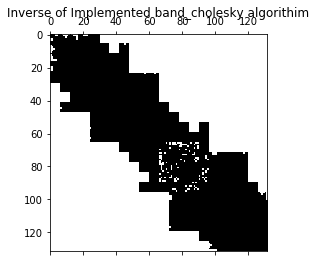

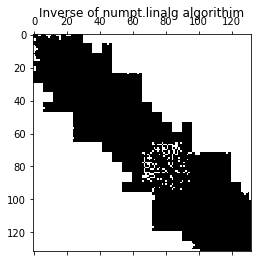

error relative to original matrix of cholesky:           5.960464477539063e-08
error relative to original matrix of band_cholesky:      5.960464477539063e-08
error relative to original matrix of np.linalg.cholesky: 0.0


In [32]:

L1_inverse = inverse_cholesky(L1)
L2_inverse = inverse_cholesky(L2)
L3_inverse = inverse_cholesky(L3)

plt.spy(L1_inverse)
plt.title("Inverse of Implemented cholesky algorithim")
plt.show()
error1 = abs(abs(np.sum(A))-abs(np.sum(L1_inverse)))


plt.spy(L2_inverse)
plt.title("Inverse of Implemented band_cholesky algorithim")
plt.show()
error2 = abs(abs(np.sum(A))-abs(np.sum(L2_inverse)))


plt.spy(L3_inverse)
plt.title("Inverse of numpt.linalg algorithim")
plt.show()
error3 = abs(abs(np.sum(A))-abs(np.sum(L3_inverse)))

print("error relative to original matrix of cholesky:           {}".format(error1))
print("error relative to original matrix of band_cholesky:      {}".format(error2))
print("error relative to original matrix of np.linalg.cholesky: {}".format(error3))


## Observations & Discussion

It can be observed that the results of the factorisation using the different 
methods are all near identical, however when using $A  = LL^T$ to go back to the 
original matrix it can be seen that there appears to be quite drastic differences
between the results. However when looking at the overall error between the calculations
and the original matrix, it can be seen that they all have identical errors 
of magnitude $10^{-8}$. Because of this we can identify that the differences in appearance
between the methods is due to floating point errors in the matrix due to the calculations.
The 'spy()' function  will plot the contents of an array on a 2D plain, plotting only if a 
value is 0 or non-zero, this will result in all the float errors of magnitude $10^{-34}$
being plotted on the graph, even though they contribute very little to the matrix.

## Conclusions

It can be concluded that all 3 algorithms work correctly, and will successfully factorise 
the matrix, with the exact same amount of error. It can also be assumed that the 
band_cholesky algorithm will be more efficient than the other's as it will do fewer 
computations.


# Question 4

## Introduction



## Procedure


In [33]:
def matrix_solution(a1):
    n = len(a1)
    b = []
    a = a1.copy()

    for i in range(n):
        b.append(sum(a[i]))
    return np.asarray(b)

def findError(b):
    n = len(b)
    exact = np.ones(n)
    print(np.linalg.norm(b-exact))



In [12]:
def forward_sub(A, b, p):
    n = len(A)

    for j in range(n):
        λ = min(j + p , n)
        b[j] = b[j]/A[j,j]
        b[j+1:λ] = b[j+1:λ] - A[j+1:λ,j]*b[j]
    return b

def backward_sub(A1, b, p):
    n = len(b)
    A = A1.copy()

    for j in range(n-1, -1, -1):
        λ = max(0, j - p)
        b[j] = b[j] / A[j, j]
        b[λ:j] = b[λ:j] - (np.transpose(A[j,λ:j])*b[j])
    return b


In [14]:
def solve(l, b):
    n = len(b)

    # solution of ly=b

    for k in range(n):
        b[k] = (b[k] - np.dot(l[k, 0:k], b[0:k])) / l[k, k]

    # solution of l^t x =y

    for k in range(n - 1, -1, -1):
        b[k] = (b[k] - np.dot(l[k + 1:n, k], b[k + 1:n])) / l[k, k]

    return b


In [16]:
def band_solve(A1, b1, p):
    A = A1.copy()
    b = b1.copy()

    forward_sub(A, b, p)
    backward_sub(A, b, p)
    return b


A = load()
l = band_cholesky(A, 48)
b = matrix_solution(A)

x = band_solve(l, b, 48)
findError(x)

x = solve(l, b)
findError(x)

1.394729564515682e-12
2.459949433441565e-12
